In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
from scipy.integrate import odeint

path = "/home/muon02/Documents/Tesis/lgca_0D/"

### First try

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 8     |
| $N_{T}$        | 12    |
| $\nu$          | 1.0   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.5   |
| $d$            | 0     |

In [10]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


def F(Ρ,t,N_s,N_t,nu,d,p_asym,alpha,tau):
    ρS, ρT = Ρ
    N = min(N_s,N_t)
    pMUT = p_asym*(1-ρT/N)**alpha
    excludS = (N-ρS)/N
    excludT = (N-ρT)*(N-(ρT+1))/(N*(N-1))
    dρdt = np.array([(1/N)*nu*(ρS/N)*excludS*pMUT-(1/N)*nu*(ρS/N)*(1-pMUT)*excludT,
            2*(1/N)*nu*(ρS/N)*excludT*(1-pMUT)-(1/N)*d*(ρT/N)])
    return (1/tau)*dρdt


def make_graph(Ρ_S0,P_T0,N_s,N_t,nu,d,p_asym,alpha,rep,time):
    tau = 0.01
    
    P0 = [Ρ_S0,P_T0]
    t = tau*np.linspace(0, time, time+1)
    
    sol = odeint(F, P0, t, args=(N_s,N_t,nu,d,p_asym,alpha,tau))
    
    data_par_terminal = str(N_s) + " " + str(N_t) 
    data_par_terminal = data_par_terminal + " " + str(nu) + " " + str(alpha)
    data_par_terminal = data_par_terminal + " " + str(p_asym) + " " + str(d) 
    data_par_terminal = data_par_terminal + " " + str(time)+ " " + str(rep) + " " + str(Ρ_S0) + " " + str(P_T0) 
    subprocess.run("cd "+path+" && ./sim005.out 100 "+data_par_terminal, capture_output=True, shell=True)
    %run ns_info.py
    %run nt_info.py
    mean_ns = np.array([ns_info[i][0] for i in range(time)])
    std_ns = np.array([ns_info[i][1] for i in range(time)])
    best_mean_ns = mean_ns + std_ns
    worst_mean_ns = mean_ns - std_ns
    mean_nt = np.array([nt_info[i][0] for i in range(time)])
    std_nt = np.array([nt_info[i][1] for i in range(time)])
    best_mean_nt = mean_nt + std_nt
    worst_mean_nt = mean_nt - std_nt
    
    plt.figure(dpi=200)
    
    plt.plot(np.arange(time)*tau, mean_ns, '--', color="midnightblue",label=r'$\rho_{S}$ simulación')
    plt.fill_between(np.arange(time)*tau, worst_mean_ns, best_mean_ns,alpha=0.2)
    
    plt.plot(np.arange(time)*tau, mean_nt, '--', color="firebrick",label=r'$\rho_{T}$ simulación')
    plt.fill_between(np.arange(time)*tau, worst_mean_nt, best_mean_nt,alpha=0.2)

    plt.plot(t, sol[:, 0], 'b', label=r'$\rho_{S}(t)$')

    plt.plot(t, sol[:, 1], 'r', label=r'$\rho_{T}(t)$')

    plt.xlabel('Tiempo')
    plt.ylabel('Densidad')

    plt.grid(axis='y')
    plt.legend(loc='best')
    
    plt.savefig('./simulations/'+data_par_terminal+'.jpg',dpi=1000)

    plt.show()

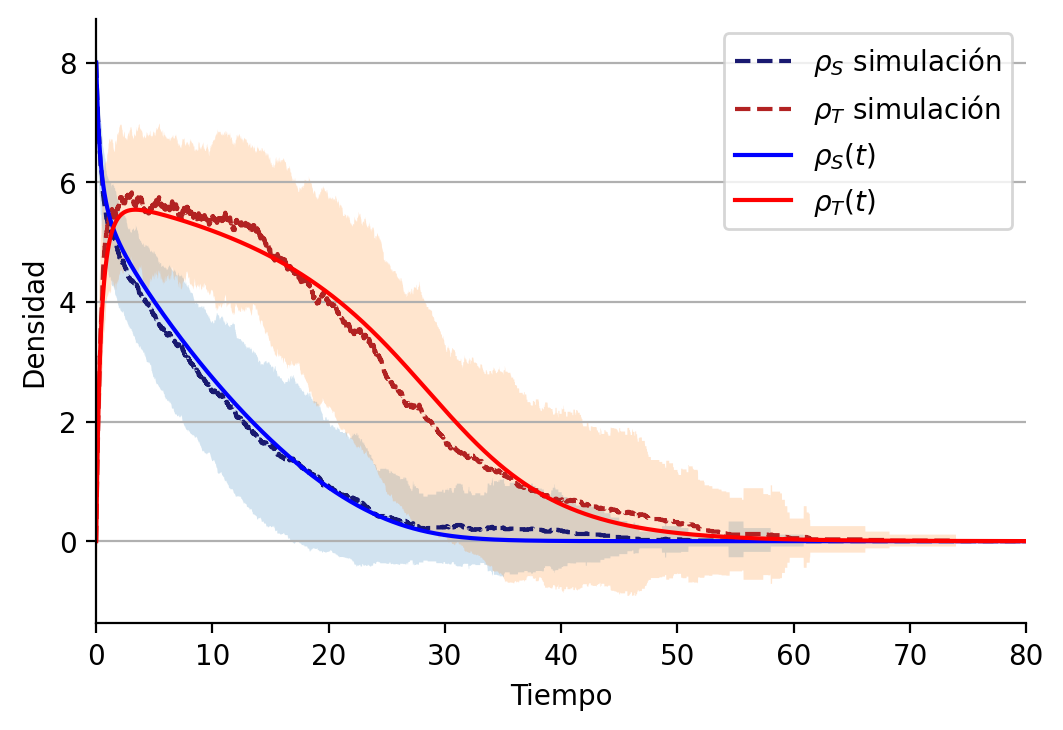

In [3]:
make_graph(8,0,8,12,1.0,0.1,0.4,2,100,10000)

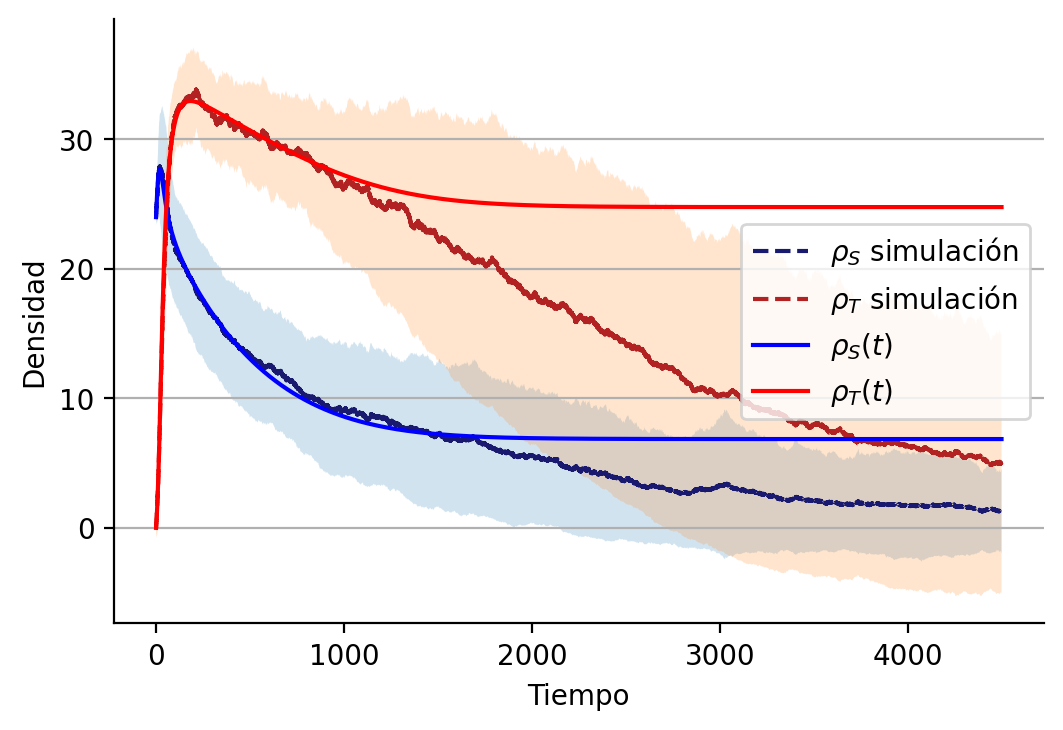

In [25]:
make_graph(24,0,48,48,1.0,0.1,0.9,2,100,450000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.3   |
| $d$            | 0.5   |

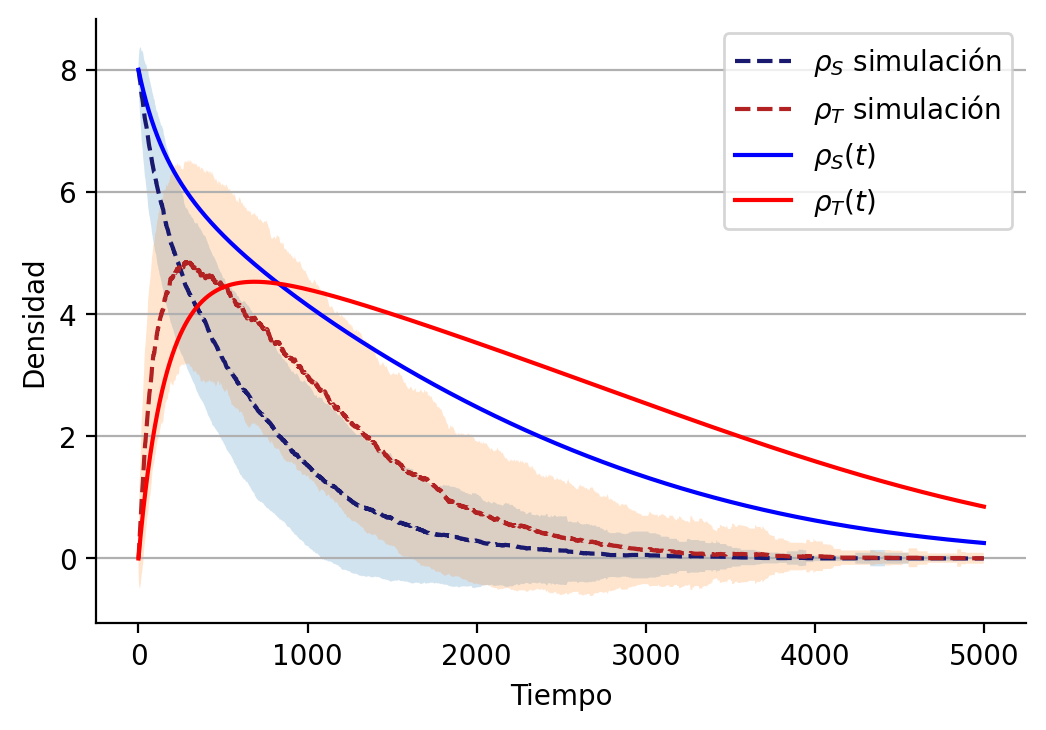

In [15]:
#Ρ_S0,P_T0,N_s,N_t,nu,d,p_asym,alpha,rep,time)
make_graph(8,0,12,12,0.8,0.5,0.3,2,500,10000,5000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.5   |
| $d$            | 0.5   |

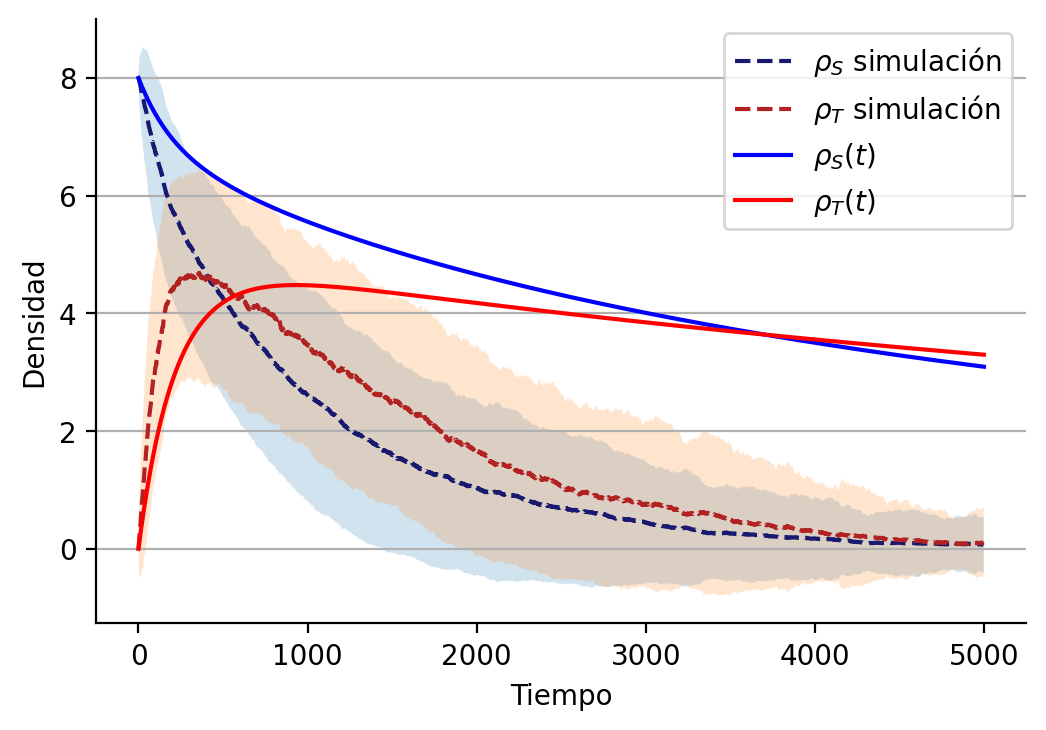

In [18]:
make_graph(8,0,12,12,0.8,0.5,0.5,2,500,10000,5000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.8   |
| $d$            | 0.5   |

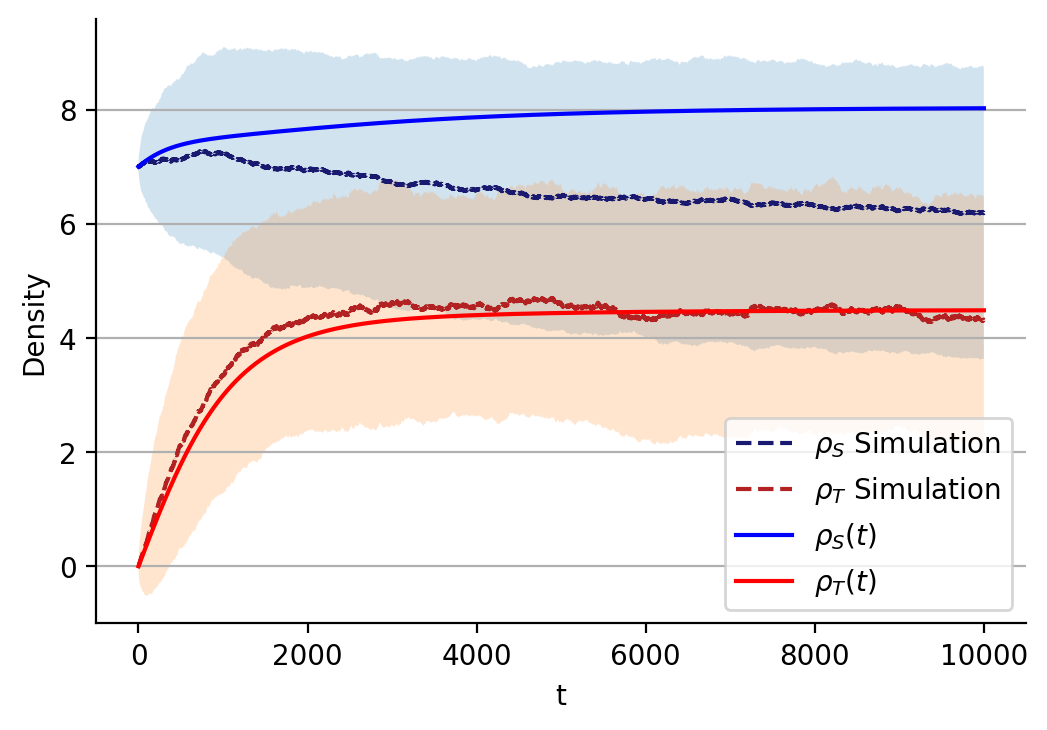

In [7]:
make_graph(7,0,12,12,0.8,0.5,0.8,2,500,10000)